In [2]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Convert integer gt label to one hot gt label
def convert_integer2onehot(ground_truth_integer, n_class=10):
    batch_size=len(ground_truth_integer)
    ground_truth_one_hot = torch.zeros((batch_size, n_class))
    ground_truth_one_hot[torch.arange(batch_size), ground_truth_integer] = 1
    return ground_truth_one_hot

In [4]:
batch_size = 16
def generate_regression(batch_size=16):
    return torch.rand(batch_size), torch.rand(batch_size) 

In [5]:
predicted, ground_truth = generate_regression()

In [6]:
print("predicted.shape == ", predicted.shape, "ground_truth.shape == ", ground_truth.shape)

predicted.shape ==  torch.Size([16]) ground_truth.shape ==  torch.Size([16])


### MSE Loss

In [7]:
loss = nn.MSELoss(reduction="mean")
loss(predicted, ground_truth)

tensor(0.1465)

In [8]:
loss = nn.MSELoss(reduction="none")
loss(predicted, ground_truth)

tensor([1.9325e-02, 1.6760e-02, 2.1789e-02, 2.2664e-02, 2.8633e-06, 3.5684e-03,
        5.3261e-04, 1.6606e-01, 7.9797e-01, 4.6726e-01, 1.5404e-01, 9.1131e-03,
        1.0958e-01, 3.3363e-01, 1.3246e-01, 8.8661e-02])

In [9]:
torch.mean(loss(predicted, ground_truth))

tensor(0.1465)

### MAE Loss

In [10]:
loss = nn.L1Loss(reduction="mean")
loss(predicted, ground_truth)  # shape==(1,)

tensor(0.2934)

### Huber Loss

In [11]:
loss = nn.HuberLoss(reduction="mean")
loss(predicted, ground_truth)  # shape==(1,)

tensor(0.0732)

### Plot으로 각 Regression Loss (MSE vs. MAE vs. Huber) 을 비교해보자

In [12]:
N=100
y_pred = np.linspace(-3, 3, N)
y_pred = torch.Tensor(y_pred)
y_true = torch.zeros(N)

In [13]:
l1_loss_fn = nn.L1Loss(reduction="none")
l1_list = l1_loss_fn(y_pred, y_true)

In [14]:
mse_loss_fn = nn.MSELoss(reduction="none")
mse_list = mse_loss_fn(y_pred, y_true)

In [15]:
huber_loss_fn = nn.HuberLoss(reduction="none")
huber_list = huber_loss_fn(y_pred, y_true)

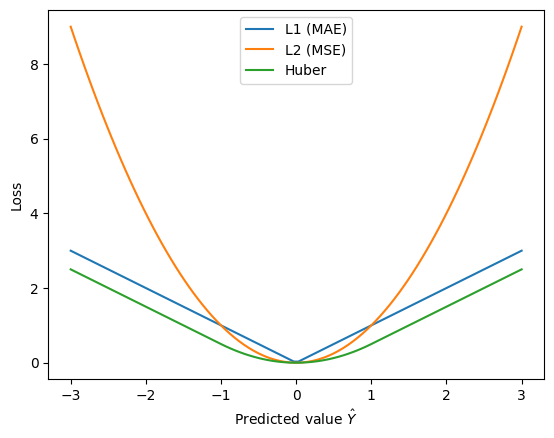

In [16]:
os.makedirs('figures', exist_ok=True)

plt.figure()
plt.plot(y_pred, l1_list.numpy(), label='L1 (MAE)')
plt.plot(y_pred, mse_list.numpy(), label='L2 (MSE)')
plt.plot(y_pred, huber_list.numpy(), label='Huber')
plt.legend()
plt.xlabel(r"Predicted value $\hat{Y}$")
plt.ylabel('Loss')
plt.savefig('figures/regression_loss_fn.png', dpi=300)

### Loss function for classification


In [17]:
batch_size = 16
n_class=10
def generate_classification(batch_size=16, n_class=10):
    pred = torch.nn.Softmax()(torch.rand(batch_size, n_class))
    gt = torch.argmax(torch.rand(batch_size, n_class),dim=1)
    return pred, gt


In [18]:
batch_size = 16
n_class=10

def generate_onehot(batch_size=16, n_class=10):
    pred = torch.nn.Softmax()(torch.rand(batch_size, n_class))
    gt = torch.rand(batch_size, n_class)
    gt = torch.tensor(gt == torch.max(gt, dim=1, keepdim=True)[0]).float()  # convert to onehot
    return pred, gt


In [19]:
predicted, ground_truth = generate_classification()

In [20]:
predicted.shape  # (batch_size, n_class)

torch.Size([16, 10])

In [21]:
ground_truth.shape  # (batch_size, )

torch.Size([16])

### Cross Entropy Loss

In [22]:
loss = nn.CrossEntropyLoss(reduction="mean")

In [23]:
print("predicted.shape == ", predicted.shape, "ground_truth.shape == ", ground_truth.shape)

predicted.shape ==  torch.Size([16, 10]) ground_truth.shape ==  torch.Size([16])


In [24]:
loss(predicted, ground_truth)

tensor(2.3058)

In [25]:
# nn.CrossEntropyLoss 직접 구현해본 버전
def CE_loss(predicted, ground_truth):
    # convert ground_truth into 
    loss = 0.
    exp_pred = torch.exp(predicted)  # take exponential
    for batch_i in range(len(predicted)):
        
        for j in range(len(predicted[0])):
            if j == ground_truth[batch_i]:
                loss = loss + torch.log( exp_pred[batch_i][j] / torch.sum(exp_pred, axis=1)[batch_i] )
    return -loss / len(predicted)

In [26]:
CE_loss(predicted, ground_truth)

tensor(2.3058)

In [27]:
loss = nn.BCELoss(reduction="mean")

In [28]:
print("predicted.shape == ", predicted.shape, "ground_truth.shape == ", ground_truth.shape)

predicted.shape ==  torch.Size([16, 10]) ground_truth.shape ==  torch.Size([16])


In [29]:
loss(predicted, ground_truth)  # error

ValueError: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 10])) is deprecated. Please ensure they have the same size.

In [30]:
predicted, ground_truth = generate_onehot()

In [31]:
print("predicted.shape == ", predicted.shape, "ground_truth.shape == ", ground_truth.shape)

predicted.shape ==  torch.Size([16, 10]) ground_truth.shape ==  torch.Size([16, 10])


In [32]:
loss(predicted, ground_truth)

tensor(0.3308)

In [33]:
# nn.BCELoss을 직접 구현해본 버전

def BCE_loss(predicted, ground_truth):
    loss = 0.
    for batch_i in range(len(predicted)):
        for j in range(len(predicted[0])):
            loss = loss \
            + ground_truth[batch_i][j] * torch.log(predicted[batch_i][j]) \
            + (1 - ground_truth[batch_i][j]) * torch.log(1 - predicted[batch_i][j])
            
    return - loss / (len(predicted) * len(predicted[0]))
            
            

In [34]:
BCE_loss(predicted, ground_truth)

tensor(0.3308)

In [35]:
loss = nn.BCEWithLogitsLoss(reduction="mean")

In [36]:
loss(predicted, ground_truth)

tensor(0.7347)

In [37]:
loss = nn.BCELoss(reduction="mean")

In [38]:
loss(torch.nn.Sigmoid()(predicted), ground_truth)

tensor(0.7347)

### L1 Loss

In [39]:
predicted, ground_truth = generate_onehot()

In [40]:
loss = nn.L1Loss(reduction="mean")

In [41]:
loss(predicted, ground_truth)

tensor(0.1827)

### KL Divergence Loss

In [42]:
predicted, ground_truth = generate_onehot()  # BCELoss와 마찬가지로 GT이 onehot일 경우

In [43]:
loss = nn.KLDivLoss(reduction="mean")

In [44]:
loss(predicted, ground_truth)  # error

tensor(-0.0095)

### Plot으로 각 Classification Loss (CE Loss vs. L1 Loss vs. KL Div Loss) 비교하기


In [45]:
def ce_loss(y, y_true):
    return -(y_true * np.log(y) + (1 - y_true)*np.log(1 - y))
    
    
def l1_loss(y, y_true):
    return np.abs(y - y_true)

def kl_loss(y, y_true):
    return (y_true * np.log (y_true) - y_true * np.log(y) + (1-y_true)*np.log(1-y_true)-(1-y_true)*np.log(1- y))



In [46]:
def plot_graph(y_true=0.99):
    x_values = np.linspace(0.01, 0.99, 50)

    ce = [ce_loss(i, y_true) for i in x_values]
    l1 = [l1_loss(i, y_true) for i in x_values]
    kl = [kl_loss(i, y_true) for i in x_values]

    plt.figure()
    plt.plot(x_values, ce, label="Cross Entropy Loss")
    plt.plot(x_values, l1, label="L1 Loss")
    plt.plot(x_values, kl, label=r"KL divergence Loss")
    plt.xlabel(r"Predicted Probability $\hat{Y}$")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("y true = %.2f" % y_true)
    plt.savefig(f"figures/loss_class_%.2f.png" % y_true, format="png", dpi=600)
    plt.show()


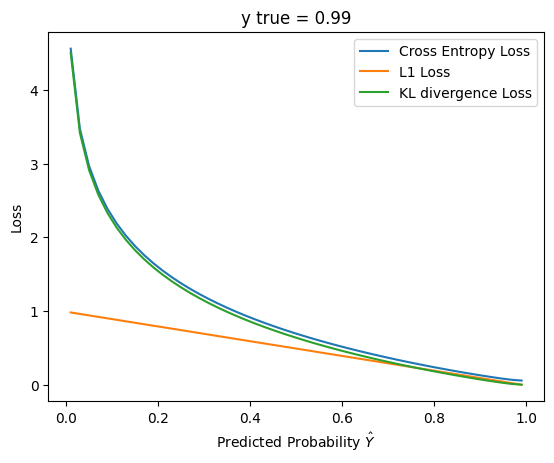

In [47]:
plot_graph(0.99)

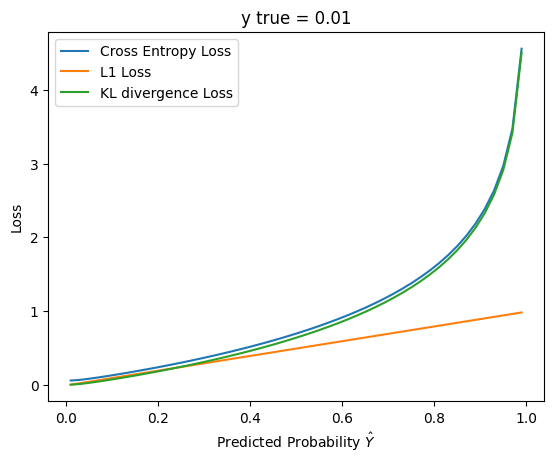

In [48]:
plot_graph(0.01)

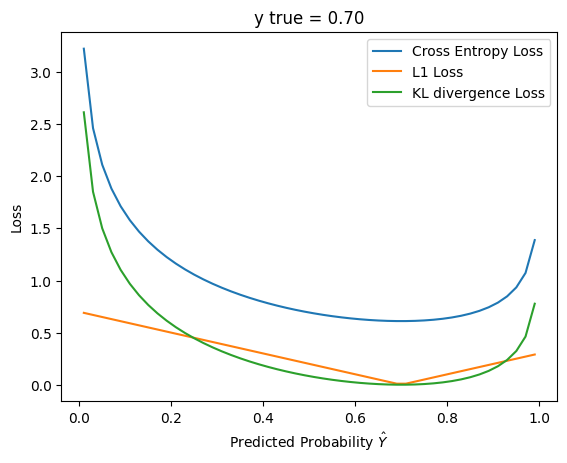

In [49]:
plot_graph(0.7)

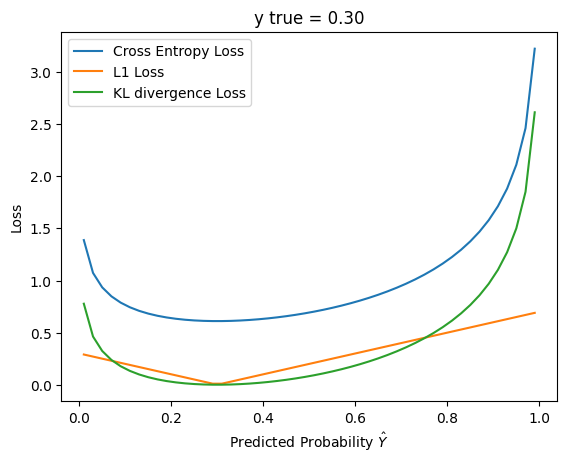

In [50]:
plot_graph(0.3)